<a href="https://colab.research.google.com/github/saimasharleen/kaggle/blob/main/adultcensusincomedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Introduction**

The main goal of the final project of COMP 6981 is to make sure that we can use and reason around all content seen in this course.

# **2 Important Libraries & Configuration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
seed = 321
#connecting Google Drive with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Dataset Presentation**

# **Adult Census Income Dataset**
# Source: [https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)

In this task we will use the UCI Adult Dataset that contain 15 variables as described below. The main objective is to predict whether income exceeds $50K/yr based on census data.

There are total 15 columns in this dataset.

*   Age: Describes the age of individuals. Continuous.
*   Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*   fnlwgt: Continuous.
*   education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*   education-num: Number of years spent in education. Continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*   occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*   relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*   race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*   sex: Female, Male.
*   capital-gain: Continuous.
*   capital-loss: Continuous.
*   hours-per-week: Continuous.
*   native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*   salary: >50K,<=50K

**Does your data contain missing data?**

Yes, in our dataset three attributes contain missing data, these are: workclass, occupation, native.country

# **Contextualizing**
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

In [2]:
import pandas as pd
# preparing the data
df_adult = pd.read_csv('/content/gdrive/My Drive/Data/adult.csv')
df_adult
# let's check the rows with mising data
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As can be seen in the plot above, there are no missing values in this dataset. 

In [3]:
#renaming the column names
df_adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']

In [4]:
df_adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Although the dataset does not contain any null values, a closer look tells us that there are a lot of '?' values in our dataset. We will have to replace those missing values

In [5]:
df_adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df_adult[df_adult == '?'] = np.nan
df_adult.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see from this plot that, workclass, occupation and native.country contains several missing values.

We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with these kind of mising values.


**Are outliers present in your data?**

Yes, We are considering fnlwgt attribute as outliers of our dataset.

Here, we are trying to plot the outliers in the boxplot to identify the percentage of outliers.

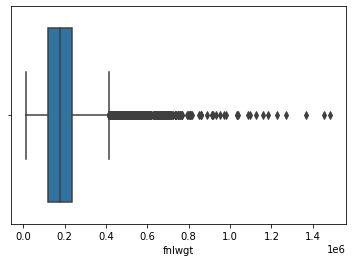

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.boxplot(df_adult['fnlwgt'])


In [8]:
# Select the first quantile
q1 = df_adult['fnlwgt'].quantile(.25)

# Select the third quantile
q3 = df_adult['fnlwgt'].quantile(.75)
 
iqr = q3 - q1

lower= q1 - (iqr*1.5)
uper= q3 + (iqr*1.5)


lowOutcount= len(df_adult[df_adult['fnlwgt'] < lower])
uputcount= len(df_adult[df_adult['fnlwgt'] > uper])

print('Total outliers: '+ str(lowOutcount+uputcount))
 

Total outliers: 992


Target attribute (target) - income, categorical. 

There are two categories ">50K" and "<=50K". 

In this case, the problem of classification is considered.

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


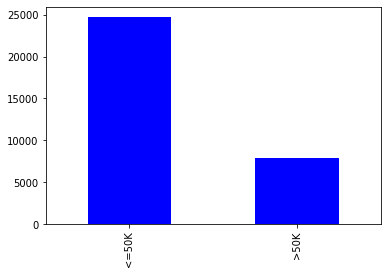

In [9]:
# Visualization of the percentage of people earning more than 50K and less than 50K
df1 = df_adult["income"].value_counts(normalize = True)
print(df1*100)
# visualization of the result
df2 = df_adult["income"].value_counts().plot(kind = 'bar',color = "blue")
print(df2)

As you can see, there are significantly more people earning less than 50K than those who earn more than 50K.

In [10]:
data_edu=df_adult["education"]
data_edu.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [11]:
data_country=df_adult["native.country"]
data_country.unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [12]:
data_marital=df_adult["marital.status"]
data_marital.unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [13]:
data_sex=df_adult["sex"]
data_sex.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
data_work=df_adult["workclass"]
data_work.unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
data_occupation=df_adult["occupation"]
data_occupation.unique()

array([nan, 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [16]:
data_race=df_adult["race"]
data_race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

#Data distribution
we can think of a distribution as a function that describes the relationship between observations in a sample space. The values below are discrete, suppose we have a continuous variable at X-axis, then we can represent using a histogram. **bold text**

To show our data distribution, we use a histogram because it is a chart that plots the distribution of a numeric variable’s values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar’s height indicates the frequency of data points with a matter within the corresponding bin.

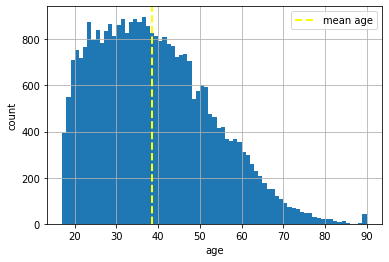

In [17]:
# Age distribution
ages = df_adult['age'].hist(bins=max(df_adult['age'])-min(df_adult['age']))
mean_val = np.mean(df_adult['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='yellow', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

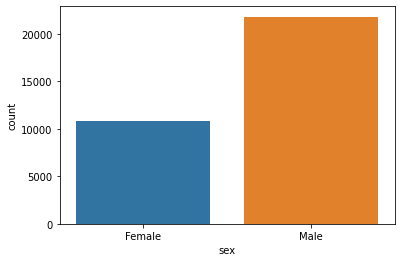

In [18]:
# Sex distribution
sns.countplot(df_adult['sex'])
plt.show()

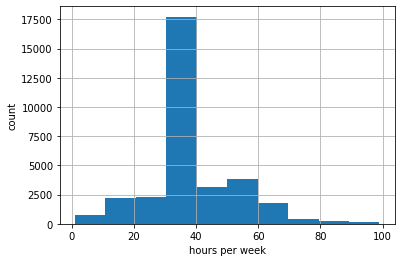

In [19]:
df_adult['hours.per.week'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

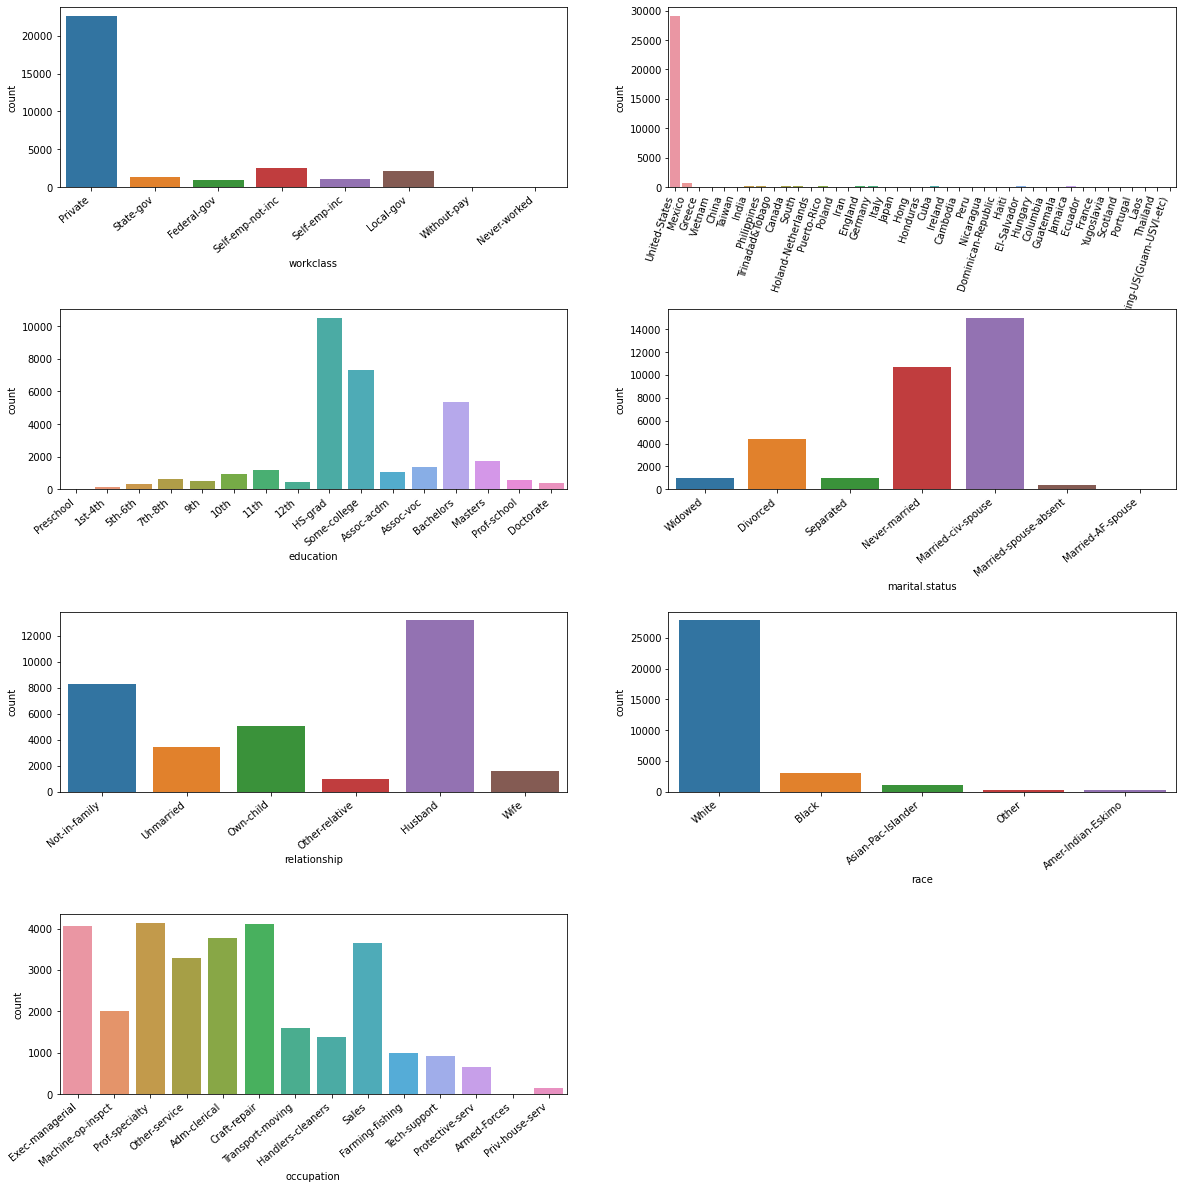

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])


# Workclass
wc_plot = sns.countplot(df_adult['workclass'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Native country
nc_plot = sns.countplot(df_adult['native.country'], ax=axs[0][1])
nc_plot.set_xticklabels(nc_plot.get_xticklabels(), rotation=72, ha="right")

# Education
order=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
       'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ed_plot = sns.countplot(df_adult['education'], order=order, ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(df_adult['marital.status'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(df_adult['relationship'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(df_adult['race'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(df_adult['occupation'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

How do features relate to one another?

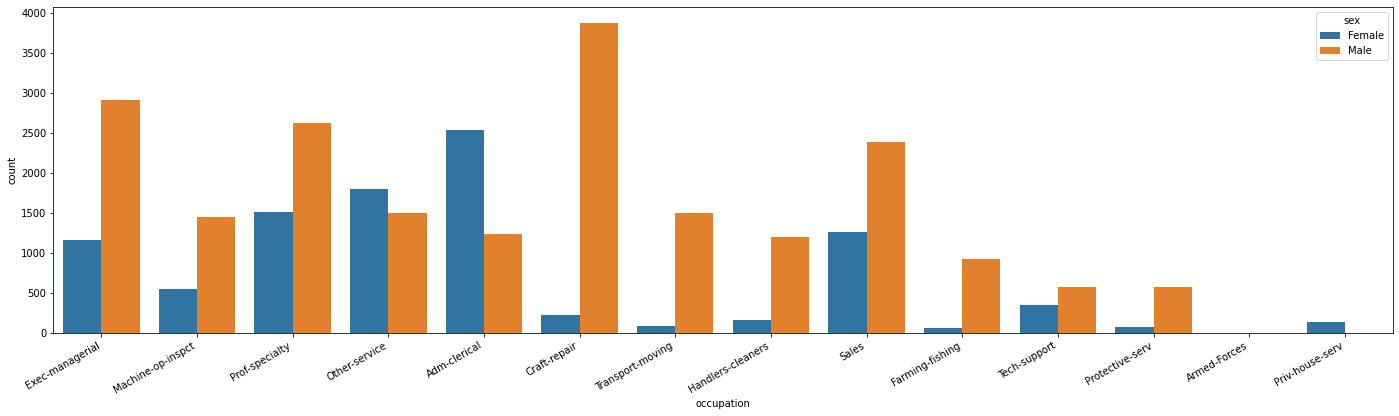

In [21]:
plt.figure(figsize=(24, 6))
ro = sns.countplot(df_adult['occupation'], hue=df_adult['sex'])
ro.set_xticklabels(ro.get_xticklabels(), rotation=30, ha="right")
plt.show()

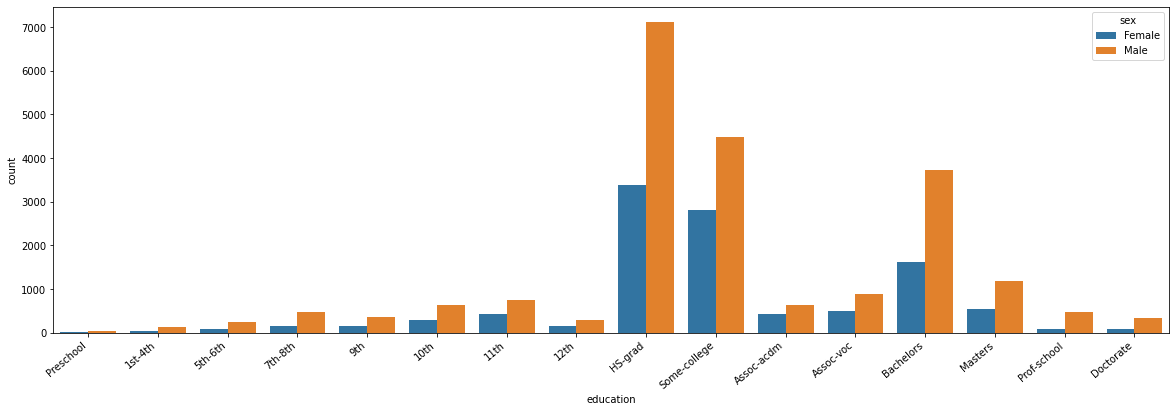

In [22]:
plt.figure(figsize=(20, 6))
ro = sns.countplot(df_adult['education'], hue=df_adult['sex'], order=order)
ro.set_xticklabels(ro.get_xticklabels(), rotation=40, ha="right")
#ro.set_yscale('log')
plt.show()

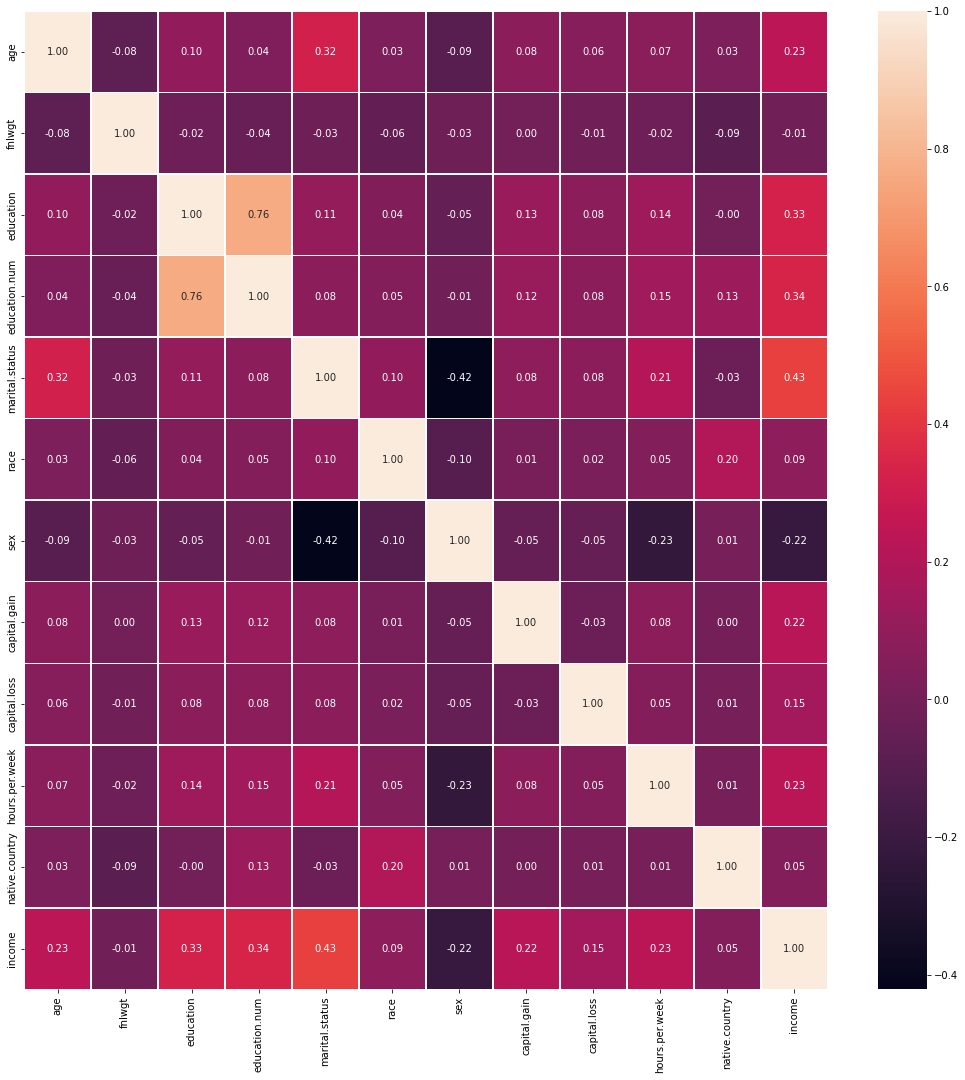

In [27]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_adult.corr(),annot=True,linewidth=.5,fmt='.2f',ax=ax)
df_adult.corr()
plt.show()

In [23]:
df_adult['income'] = df_adult['income'].map({'<=50K': 0, '>50K': 1}) 

**Data Encoding and ? Removal**

Before we do any operation on this data set, we need to convert all Categorical features of the data set into numerical - non null values. This begins with us encoding all categorical data, we do not do this on Smoking status as we eventaully want to predict missing values from this category so we instead apply a manual labeling based approach. 


In [24]:
print("Before ? removal: \n")
df_adult[df_adult == '?'] = np.nan
df_adult.info()

Before ? removal: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [25]:
#Labeling sex Category Numerically
df_adult["sex"] = df_adult["sex"].map({"Male": 0, "Female":1})
df_adult["marital.status"] = df_adult["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df_adult["marital.status"] = df_adult["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
#Labeling marital status Numerically
df_adult["marital.status"] = df_adult["marital.status"].map({"Married":1, "Single":0})
df_adult["marital.status"] = df_adult["marital.status"].astype(int)
df_adult["education"] = df_adult["education"].replace(["Bachelors","Masters","Doctorate","Prof-school"],"HighEdu")
df_adult["education"] = df_adult["education"].replace(["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th","HS-grad", 
                    "Assoc-acdm","Assoc-voc","Some-college"],"LowEdu")
#Labeling education Numerically
df_adult["education"] = df_adult["education"].map({"HighEdu":1, "LowEdu":0})
df_adult["education"] = df_adult["education"].astype(int)
df_adult["race"] = df_adult["race"].replace(['White'],"WhiteRace")
df_adult["race"] = df_adult["race"].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'],"OtherRace")
#Labeling race Numerically
df_adult["race"] = df_adult["race"].map({"WhiteRace":1, "OtherRace":0})
df_adult["race"] = df_adult["race"].astype(int)
df_adult["native.country"] = df_adult["native.country"].replace(['United-States','England','Canada','Germany', 'France', 'Italy',
                        'China', 'Japan', 'Scotland', 'Ireland','Holand-Netherlands'],"HighPriceCountry")

df_adult["native.country"] = df_adult["native.country"].replace(['Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
                        'South', 'Puerto-Rico', 'Honduras','Iran', 'Philippines', 'Poland','Columbia', 'Cambodia',
                        'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal','Yugoslavia', 'Peru',
                        'Outlying-US(Guam-USVI-etc)', 'Trinadad&Tobago','Greece', 'Nicaragua', 'Vietnam', 'Hong',
                        'Hungary','Dominican-Republic', 'El-Salvador', 'Guatemala' ],"LowPriceCountry")
#Labeling native country Numerically
df_adult["native.country"] = df_adult["native.country"].map({"HighPriceCountry":1, "LowPriceCountry":0})
df_adult = df_adult.fillna(0)
df_adult["native.country"] = df_adult["native.country"].astype(int)
df_adult.head(20)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,0,9,0,0,Not-in-family,1,1,0,4356,40,1,0
1,82,Private,132870,0,9,0,Exec-managerial,Not-in-family,1,1,0,4356,18,1,0
2,66,0,186061,0,10,0,0,Unmarried,0,1,0,4356,40,1,0
3,54,Private,140359,0,4,0,Machine-op-inspct,Unmarried,1,1,0,3900,40,1,0
4,41,Private,264663,0,10,0,Prof-specialty,Own-child,1,1,0,3900,40,1,0
5,34,Private,216864,0,9,0,Other-service,Unmarried,1,1,0,3770,45,1,0
6,38,Private,150601,0,6,0,Adm-clerical,Unmarried,1,0,0,3770,40,1,0
7,74,State-gov,88638,1,16,0,Prof-specialty,Other-relative,1,1,0,3683,20,1,1
8,68,Federal-gov,422013,0,9,0,Prof-specialty,Not-in-family,1,1,0,3683,40,1,0
9,41,Private,70037,0,10,0,Craft-repair,Unmarried,1,0,0,3004,60,0,1


In [26]:
df_adult.drop(labels=["workclass","occupation","relationship"], axis = 1, inplace = True)
df_adult.head(20)

,age,fnlwgt,education,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,77053,0,9,0,1,1,0,4356,40,1,0
1,82,132870,0,9,0,1,1,0,4356,18,1,0
2,66,186061,0,10,0,0,1,0,4356,40,1,0
3,54,140359,0,4,0,1,1,0,3900,40,1,0
4,41,264663,0,10,0,1,1,0,3900,40,1,0
5,34,216864,0,9,0,1,1,0,3770,45,1,0
6,38,150601,0,6,0,1,0,0,3770,40,1,0
7,74,88638,1,16,0,1,1,0,3683,20,1,1
8,68,422013,0,9,0,1,1,0,3683,40,1,0
9,41,70037,0,10,0,1,0,0,3004,60,0,1


In [28]:
df_adult

,age,fnlwgt,education,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,77053,0,9,0,1,1,0,4356,40,1,0
1,82,132870,0,9,0,1,1,0,4356,18,1,0
2,66,186061,0,10,0,0,1,0,4356,40,1,0
3,54,140359,0,4,0,1,1,0,3900,40,1,0
4,41,264663,0,10,0,1,1,0,3900,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,0,10,0,1,0,0,0,40,1,0
32557,27,257302,0,12,1,1,1,0,0,38,1,0
32558,40,154374,0,9,1,1,0,0,0,40,1,1
32559,58,151910,0,9,0,1,1,0,0,40,1,0


In [29]:
print("\n \n After ? removal: \n")
df_adult.info()


 
 After ? removal: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education       32561 non-null  int64
 3   education.num   32561 non-null  int64
 4   marital.status  32561 non-null  int64
 5   race            32561 non-null  int64
 6   sex             32561 non-null  int64
 7   capital.gain    32561 non-null  int64
 8   capital.loss    32561 non-null  int64
 9   hours.per.week  32561 non-null  int64
 10  native.country  32561 non-null  int64
 11  income          32561 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


# Data Scaling
Within this section we will describe and perform 3 data scaling techniques within our data set.

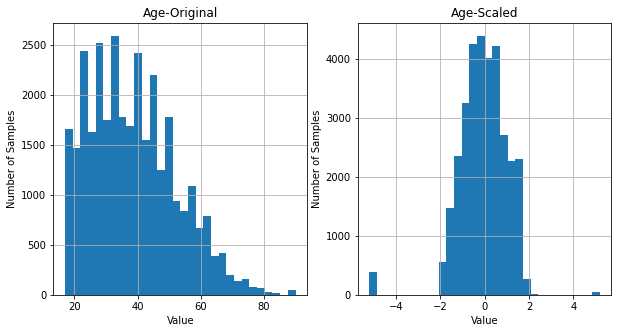

In [36]:
from sklearn.preprocessing import QuantileTransformer

dfage = df_adult.copy()
scaler = QuantileTransformer(n_quantiles=15, random_state=0, output_distribution="normal")

#Applying Quantile Transform into age column 
dfage["age"] = scaler.fit_transform(dfage[["age"]])

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.flatten()

#Plots original distribtion of Age
df_adult["age"].hist(ax=axs[0], bins= 30)
axs[0].title.set_text("Age-Original")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Number of Samples")

#Plots scaled distribtion of age
dfage["age"].hist(ax=axs[1], bins= 30)
axs[1].title.set_text("Age-Scaled")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Number of Samples")
plt.show()

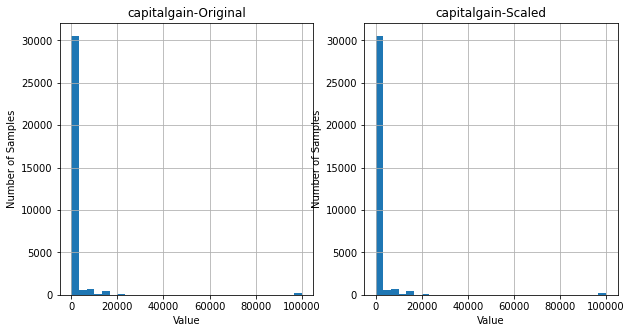

In [35]:
from sklearn.preprocessing import RobustScaler

capitalgain = df_adult.copy()
scaler = RobustScaler()

#applying Robust scaler onto capital.gain column 
capitalgain["capital.gain"] = scaler.fit_transform(capitalgain[["capital.gain"]])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.flatten()

#Plots original distribtion of capitalgain
df_adult["capital.gain"].hist(ax=axs[0], bins= 30)
axs[0].title.set_text("capitalgain-Original")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Number of Samples")

#Plots scaled distribtion of Glucose
df_adult["capital.gain"].hist(ax=axs[1], bins= 30)
axs[1].title.set_text("capitalgain-Scaled")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Number of Samples")
plt.show()

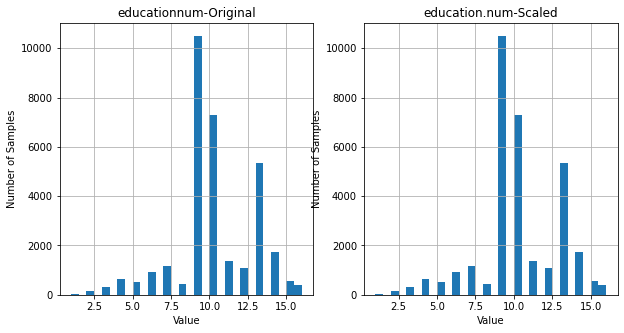

In [39]:
from sklearn.preprocessing import  MinMaxScaler
educationnum = df_adult.copy()
scaler = MinMaxScaler()

#applying Robust scaler onto education.num column 
educationnum["education.num"] = scaler.fit_transform(educationnum[["education.num"]])


fig, axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.flatten()

#Plots original distribtion of educationnum
df_adult["education.num"].hist(ax=axs[0], bins= 30)
axs[0].title.set_text("educationnum-Original")
axs[0].set_xlabel("Value")
axs[0].set_ylabel("Number of Samples")

#Plots scaled distribtion of Glucose
df_adult["education.num"].hist(ax=axs[1], bins= 30)
axs[1].title.set_text("education.num-Scaled")
axs[1].set_xlabel("Value")
axs[1].set_ylabel("Number of Samples")
plt.show()

# **Feature Selection**
A feature select strategy selects the most ”relevant” subset of attributes regarding some selection criteria.

In this section we will use two feature selection techniques. At the beganing we selected "income" as a target value

In [43]:
X= df_adult.iloc[:,:10]
y=df_adult.iloc[:,10]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

knn: 0.906749 (0.001888)
knn-minmax: 0.916827 (0.002030)
knn-zscore: 0.917548 (0.001921)
linear: 0.871877 (0.173664)
linear-minmax: 0.914581 (0.000008)
linear-zscore: 0.914350 (0.000876)
knn-maxabs: 0.916838 (0.002041)
knn-robust: 0.916884 (0.001862)
knn-quantile: 0.910346 (0.001883)
linear-maxabs: 0.914581 (0.000008)
linear-robust: 0.904837 (0.023633)
linear-quantile: 0.914581 (0.000008)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


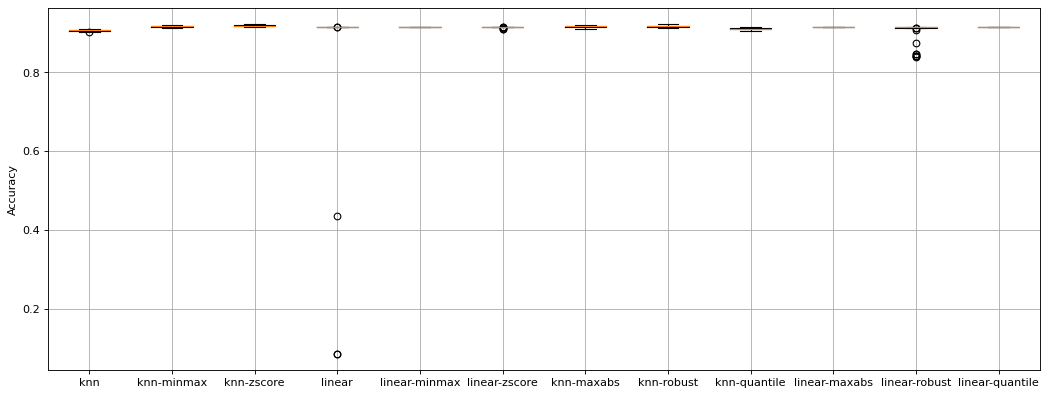

In [31]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,maxabs_scale,robust_scale,quantile_transform
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# Write your code here for task 4
models=[]
models.append(('knn', KNeighborsClassifier()))
models.append(('linear', SGDClassifier()))
scalers=[]
scalers.append(('minmax',MinMaxScaler()))
scalers.append(('zscore',StandardScaler()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    pipeline = Pipeline(steps=[('m', model)])
    # evaluate the pipeline
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    results.append(n_scores)
    names.append(name)
    msg = "%s: %f (%f)" % (name, n_scores.mean(), n_scores.std())
    print (msg)
    for s_name, scaler in scalers:
        pipeline = Pipeline(steps=[('scaler', scaler),('m', model)])
        # evaluate the pipeline
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
        n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        results.append(n_scores)
        names.append(name+'-'+s_name)
        msg = "%s: %f (%f)" % (name+'-'+s_name, n_scores.mean(), n_scores.std())
        print (msg)


s_scalers=[]
s_scalers.append('maxabs')
s_scalers.append('robust')
s_scalers.append('quantile')
for name, model in models:
    for s_name in s_scalers:
        pipeline = Pipeline(steps=[('m', model)])
        # evaluate the pipeline
        if s_name=='maxabs':
            X_train_scaled= maxabs_scale(X_train)
            X_test_scaled= maxabs_scale(X_test)
        elif s_name=='robust':
            X_train_scaled= robust_scale(X_train)
            X_test_scaled= robust_scale(X_test)
        if s_name=='quantile':
            X_train_scaled= quantile_transform(X_train)
            X_test_scaled= quantile_transform(X_test)
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
        n_scores = cross_val_score(pipeline, X_train_scaled, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        results.append(n_scores)
        names.append(name+'-'+s_name)
        msg = "%s: %f (%f)" % (name+'-'+s_name, n_scores.mean(), n_scores.std())
        print (msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 6), dpi=80)
plt.ylabel("Accuracy")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.savefig('result')

In [47]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset


import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

fs = SelectKBest(score_func=f_classif, k=9)
# apply feature selection
X_fs = fs.fit_transform(X, y)

print('Shape before Feature selection : '+ str(X.shape))
print('Shape using f_classif Feature selection : '+ str(X_fs.shape))


mi = SelectKBest(score_func=mutual_info_classif, k=9)
X_mi = fs.fit_transform(X, y)
print('Shape before Feature selection : '+ str(X.shape))
print('Shape using f_classif Feature selection : '+ str(X_mi.shape))

Shape before Feature selection : (32561, 10)
Shape using f_classif Feature selection : (32561, 9)
Shape before Feature selection : (32561, 10)
Shape using f_classif Feature selection : (32561, 9)


In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold

Knei = SGDClassifier()
rfe = RFE(estimator=Knei, n_features_to_select=1, step=1)
X_sel = rfe.fit_transform(X, y)
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(Knei, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [49]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# create dataset

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 
model = KNeighborsClassifier(n_neighbors=5)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy KNeighborsClassifier with out Feature selection : %.2f' % (mean(scores)))
scoresX_mi = cross_val_score(model, X_mi, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy KNeighborsClassifier : %.2f' % (mean(scoresX_mi)))

model = KNeighborsClassifier(n_neighbors=5)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy KNeighborsClassifier with out RFE Feature selection : %.2f' % (mean(scores)))
scoresX_RFE = cross_val_score(model, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy KNeighborsClassifier : %.2f' % (mean(scoresX_RFE)))

Accuracy KNeighborsClassifier with out Feature selection : 0.91
Accuracy KNeighborsClassifier : 0.91
Accuracy KNeighborsClassifier with out RFE Feature selection : 0.91
Accuracy KNeighborsClassifier : 0.91
